# Correction of practice 11

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as sksel
import sklearn.preprocessing as skprepro
import sklearn.linear_model as skmod

In [10]:
df = pd.read_parquet(r"D:\KBTU\2022-2023\Python Course\Course\Pratices\Practice_11\Data_to_analyse.parquet")
print(df)

     Account_money  Age  Money_given
0         59781878   81   569.984834
1         72742895   39   812.686814
2         22068382   34   758.240188
3         42234777   69   694.674949
4         74637447   21   965.911727
..             ...  ...          ...
995       85403167   44   808.895932
996       16766354   20   816.391936
997       96516749   45   949.277095
998       40368947   80   635.242943
999       33795363   74   624.205544

[1000 rows x 3 columns]


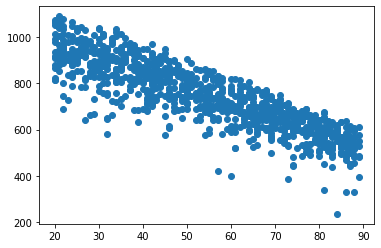

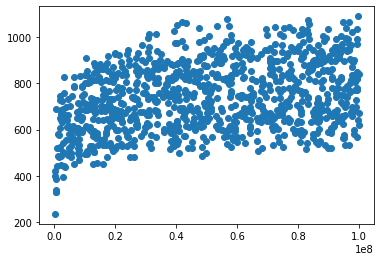

In [13]:
x1 = df['Age'].to_numpy().reshape(-1,1)
x2 = df.Account_money.to_numpy().reshape(-1,1)
y =  df.Money_given.to_numpy().reshape(-1,1)
plt.scatter(x1, y)
plt.show()
plt.scatter(x2, y)
plt.show()
# plt.scatter(x1, x2)

In [21]:
x = np.hstack([x1, x2])
x_train, x_test, y_train, y_test = sksel.train_test_split(x, y, train_size = 0.8, shuffle = True)
print(len(x_train), len(x_test))

800 200


In [17]:
x_train, x_test, y_train, y_test = sksel.train_test_split(df.loc[:,['Age', 'Account_money']], 
                                                          df.Money_given, 
                                                          train_size = 0.8, 
                                                          shuffle = True)
print(len(x_train), len(x_test))

800 200


In [23]:
scaler_x = skprepro.StandardScaler()
scaler_y = skprepro.StandardScaler()
scaler_x = scaler_x.fit(x_train)
x_train_std = scaler_x.transform(x_train)
y_train_std = scaler_y.fit_transform(y_train)
print(x_train_std)

[[-1.75901001 -1.26356481]
 [-1.05935407 -1.0405938 ]
 [ 1.38944175 -1.32158229]
 ...
 [ 1.63931887  1.36938981]
 [ 1.58934345  1.16885052]
 [ 1.63931887  1.5665815 ]]


In [26]:
model = skmod.LinearRegression().fit(x_train_std, y_train_std)
print(model.coef_)
print(model.intercept_)
#eq: y' = -0.87*x1 + 0.35*x2 + 0 (x1 = age, x2 = account money)

[[-0.8705188   0.35127697]]
[-3.24618829e-16]


In [30]:
print(model.score(x_train_std, y_train_std))
x_test_std = scaler_x.transform(x_test)
y_test_std = scaler_y.transform(y_test)
print(model.score(x_test_std, y_test_std))

0.870038184831499
0.8817890126700948


In [36]:
# John: Money on his account: 100 000$, age: 20
# Charles: Money on his account: 100 000 000$, age: 90
prediction = np.array([[20, 100_000], [90, 100_000_000]])
prediction_std = scaler_x.transform(prediction)
y_prediction_std = model.predict(prediction_std)
y_prediction = scaler_y.inverse_transform(y_prediction_std)
print(y_prediction)

[[874.73916315]
 [603.48668389]]


# Lecture 12: Logistic regression

In [ ]:
#Importation


## Logistic regression with only 2 possible outputs

In [37]:
#The data from data_man_woman
hair_length = [20, 54, 38, 22, 5, 40, 6, 2, 20, 5, 35, 3, 24, 41, 49, 18, 50, 65, 66]
gender = ["Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Male", "Female", "Female", "Female"]


In [38]:
#Change the gender by a code
gender_code = []
for i in gender:
    if i == 'Male':
        gender_code.append(0)
    if i == 'Female':
        gender_code.append(1)

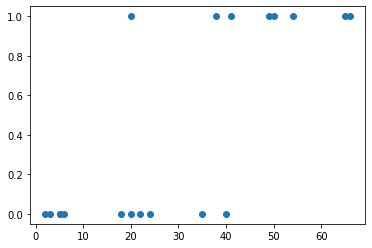

In [39]:
#Plot the data
plt.scatter(hair_length, gender_code)

In [43]:
#Create the numpy arrays like in Linear regression
arr_hair = np.array(hair_length).reshape(-1,1)
arr_gender = np.array(gender_code)

In [44]:
#Be careful, label are required in a line format not column
#use .ravel() function
print(arr_gender)
print(arr_gender.ravel())

[1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1]
[1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1]


In [45]:
#Create a logistic regression and train it
model = skmod.LogisticRegression()
model = model.fit(arr_hair, arr_gender)

In [46]:
#print the score
print(model.score(arr_hair, arr_gender))

0.8421052631578947


In [50]:
#predict the result or the probability with predict_proba (remeber to scale your x data)
print(model.predict(np.array([[50], [20], [10]])))

[1 0 0]


In [53]:
#print proba
print(model.predict_proba(np.array([[50], [20], [10]])))

[[0.09674342 0.90325658]
 [0.88505617 0.11494383]
 [0.96971231 0.03028769]]


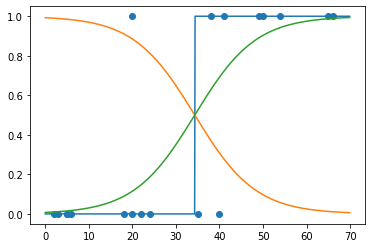

In [54]:
#plot our data, prediction and proba
plt.scatter(arr_hair, arr_gender)
plt.plot(np.arange(0,70,0.1), model.predict(np.arange(0,70,0.1).reshape(-1,1)))
plt.plot(np.arange(0,70,0.1), model.predict_proba(np.arange(0,70,0.1).reshape(-1,1)))

In [55]:
#the confusion matrix module sklearn.metrics, function confusion_matrix()
import sklearn.metrics as skmet
print(skmet.confusion_matrix(arr_gender, model.predict(arr_hair)))

[[9 2]
 [1 7]]


In [64]:
#YOUR TURN (15 minutes)
#Make a logistic regression with the folowing data (data_student_work.txt 
#in Teams):
hours_homework = [1, 10, 3, 20, 32, 6, 1, 9, 2, 10, 5]
sucess_exam = ['fail', 'pass','fail','pass','pass','fail','fail','pass','fail', 'fail', 'pass']
#precdit the probability of exam failing for a student who work 8 hours per week
#don't use train and test and don't use any Scaler
sucess_code = np.array([1 if i == 'pass' else 0 for i in sucess_exam])
hours_homework = np.array(hours_homework).reshape(-1,1)
model = skmod.LogisticRegression().fit(hours_homework, sucess_code)
print(model.predict_proba(np.array([[8]])))

[[0.47363896 0.52636104]]


## Label encoder

In [65]:
#data from Data_activities
favorite_sport = ["Base Jump", "Tea with friends", "Base Jump", "Tea with friends", "Tea with friends", "Base Jump", "Base Jump", "Tea with friends", "Video games", "Base Jump", "Base Jump", "Video games", "Tea with friends", "Video games", "Tea with friends", "Video games", "Video games", "Video games"]
age = [32, 48, 28, 83, 87, 28, 25, 81, 20, 30, 25, 12, 80, 23, 87, 12, 24, 19]

In [68]:
# Create an ecnoder LabelEncoder() and use fit_transform() function
encoder = skprepro.LabelEncoder()
fav_code = encoder.fit_transform(favorite_sport)
print(fav_code)

[0 1 0 1 1 0 0 1 2 0 0 2 1 2 1 2 2 2]


In [73]:
#label encoder : the inverse_transform method and the classes_ attributes.
print(encoder.classes_)
print(encoder.inverse_transform(np.array([0])))

['Base Jump' 'Tea with friends' 'Video games']
['Base Jump']


## OVR (one versus rest) method (more than 2 classes)

In [77]:
#data from Data_activities
age = np.array(age).reshape(-1,1)
fav_code = np.array(fav_code)

In [78]:
#make a logitic regression (use the parameter mutli_class = 'ovr')
model = skmod.LogisticRegression(multi_class = 'ovr')
model = model.fit(age, fav_code)

In [86]:
#make prediction and predict proba
predict = model.predict(np.array([[40]]))
print(encoder.inverse_transform(predict))
predict_proba = model.predict_proba(np.array([[21]]))
print(predict_proba)
print(encoder.classes_)

['Tea with friends']
[[3.22024808e-01 5.40031105e-05 6.77921189e-01]]
['Base Jump' 'Tea with friends' 'Video games']


In [89]:
print(model.score(age, fav_code))

1.0


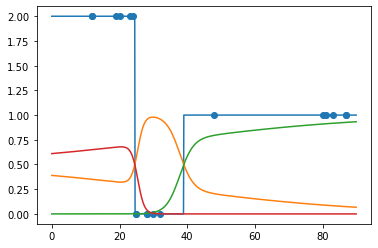

In [90]:
#plot it
plt.scatter(age, fav_code)
plt.plot(np.arange(0,90,0.1), model.predict(np.arange(0,90,0.1).reshape(-1,1)))
plt.plot(np.arange(0,90,0.1), model.predict_proba(np.arange(0,90,0.1).reshape(-1,1)))

In [91]:
#print the confusion matrix
print(skmet.confusion_matrix(fav_code, model.predict(age)))

[[6 0 0]
 [0 6 0]
 [0 0 6]]


In [100]:
#YOUR TURN (15 minutes)
#with the following data (salary in millions tenge) (file data_salary_car.txt in Teams):
Salary = [3.19, 4.28, 2.63, 4.6, 1.26, 1.17, 2.58, 4.19, 0.67, 1.88, 3.81, 1.57, 2.44, 0.97, 3.59, 1.7, 1.34, 1.91, 2.77, 2.53, 1.27]
Age= [52, 66, 56, 50, 29, 20, 36, 33, 45, 53, 24, 59, 45, 69, 68, 26, 43, 45, 61, 20, 53]
Car = ["Mercedes", "Mercedes", "Mercedes", "Toyota", "Kia", "Kia", "Toyota", "Toyota", "Peugot", "Toyota", "Peugot", "Toyota", "Toyota", "Peugot", "Mercedes", "Kia", "Toyota", "Toyota", "Mercedes", "Peugot", "Toyota"]

#Can you guess what if a probability of a 45 years old person with a salary of 2.5 millions tenge to have a mercedes?
#don't use any scaler neither test and train sets
sal = np.array(Salary).reshape(-1,1)
age = np.array(Age).reshape(-1,1)
enc = skprepro.LabelEncoder()
Car = enc.fit_transform(Car)
car = np.array(Car)
x = np.hstack([sal, age])
model = skmod.LogisticRegression(multi_class = 'ovr').fit(x, car)
prediction_x = np.array([[2.5, 45]])
print(prediction_x)
print(enc.inverse_transform(model.predict(prediction_x)))
print(enc.classes_)
print(model.predict_proba(prediction_x))

[[ 2.5 45. ]]
['Toyota']
['Kia' 'Mercedes' 'Peugot' 'Toyota']
[[0.01833553 0.10300613 0.25121112 0.62744722]]


# Code used to create a confusion matrix heat map

In [ ]:
# import seaborn as sns
# import pandas as pd

# class_names=[0,1] # name  of classes
# fig, ax = plt.subplots()
# tick_marks = np.arange(len(class_names))
# plt.xticks(tick_marks, class_names)
# plt.yticks(tick_marks, class_names)
# # create heatmap
# sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
# ax.xaxis.set_label_position("top")
# plt.tight_layout()
# plt.title('Confusion matrix', y=1.1)
# plt.ylabel('Actual label')
# plt.xlabel('Predicted label')

# # Text(0.5,257.44,'Predicted label');